In [691]:
%matplotlib inline
import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

# Vertical External Gravity

* Local gravity: a modified KG89 Model - gas gravity + DM halo with flat roation
    $$ -g(z)=2\pi G \left[\frac{\Sigma_*}{\sqrt{z^2+z_*^2}}\right]z+4\pi G\rho_{\rm dm}\frac{z}{1+z^2/R_0^2} $$

    $$ \Phi = 2\pi G \Sigma_*(\sqrt{z^2+z_*^2}-z_*) + 2\pi G \rho_{\rm dm}R_0^2\ln\left(1+\frac{z^2}{R_0^2}\right)$$

* Solar neighborhood parameter http://adsabs.harvard.edu/abs/2013ApJ...772..108Z
    * $\Sigma_{*,\odot}=42 M_{\odot} {\rm pc}^{-2}$ and $z_{*,\odot}=0.245{\rm \,kpc}$
    * $\rho_{\rm dm,\odot} =0.0064 M_{\odot} {\rm pc}^{-3}$
    * $R_\odot=8{\rm \, kpc}$
    * $\Sigma_{\rm gas,\odot}=13 M_{\odot} {\rm pc}^{-2}$
    * $\Omega_\odot=28{\rm km/s/kpc}$

* Global galaxy model:
    * stellar surface density
    $$ \Sigma_{\rm *}(R) = \Sigma_{\rm *,0}\exp (-R/R_{\rm *})$$
        * $R_*=3 {\rm kpc}$ http://adsabs.harvard.edu/abs/2008ApJ...673..864J
        * $\Sigma_{*,0}$ is set to have $\Sigma_*(R_\odot)=\Sigma_{*,\odot}$ at $R_\odot=8{\rm kpc}$
    * gas surface density
    $$ \Sigma_{\rm gas}(R) = \Sigma_{g1}\exp(-R/R_{g1}) + \Sigma_{g2}\exp(-R/R_{g2})$$
        * $R_{g1}=2 {\rm kpc}$, $R_{g2}=6 {\rm kpc}$, and $\Sigma_{g1}/\Sigma_{g2}=8$ (these are arbitrary choice)
        * $\Sigma_{g1}$ is set to have $\Sigma_{\rm gas}(R_\odot)=\Sigma_{\rm gas,\odot}$
    * midplane dark matter volume density
    $$ \rho_{\rm dm}(R) = \frac{\rho_{\rm dm,0}}{R/R_s(1+R/R_s)^2}$$
        * $R_s$ and $\rho_{\rm dm,0}$ are set to satisfy both $\rho_{\rm dm}(R_\odot)=\rho_{\rm dm,\odot}$ and $V_c(R_\odot)=224 {\rm km/s}$
    $$ V_c(R) = \sqrt{\frac{GM(R)}{R}} $$
        * $M=M_{\rm gas}+M_*+M_{\rm dm}$
    

In [692]:
params={}
params['radius']=np.array([2,4,8,16])

In [693]:
Sigma_star_sun=42*c.M_sun/c.pc**2
R_sun=8*c.kpc
R_star=2.5*c.kpc
Sigma_star0=Sigma_star_sun*np.exp(R_sun/R_star)

print Sigma_star0.to('Msun/pc^2')

1030.36626828 solMass / pc2


In [694]:
Sigma_gas_sun=10*c.M_sun/c.pc**2
R_gas1=2*c.kpc
R_gas2=6*c.kpc
ratio12=8
Sigma_gas2=Sigma_gas_sun/(ratio12*np.exp(-R_sun/R_gas1)+np.exp(-R_sun/R_gas2))
Sigma_gas1=Sigma_gas2*ratio12
print Sigma_gas2.to('Msun/pc^2'),Sigma_gas1.to('Msun/pc^2')

24.3829736594 solMass / pc2 195.063789275 solMass / pc2


[ 462.97687505  208.02848211   42.00032316    1.71202112]
[ 89.23198412  38.91788317  10.00005154   1.75965175]


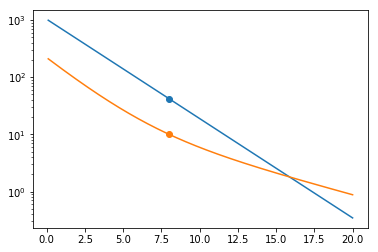

In [695]:
R=np.linspace(0.1,20,1000)*c.kpc
Sigma_star=Sigma_star0*np.exp(-R/R_star)
Sigma_gas=Sigma_gas1*np.exp(-R/R_gas1)+Sigma_gas2*np.exp(-R/R_gas2)
plt.semilogy(R.to('kpc'),Sigma_star.to('Msun/pc^2'))
plt.plot(R.to('kpc'),Sigma_gas.to('Msun/pc^2'))
plt.scatter(R_sun.to('kpc'),Sigma_star_sun.to('Msun/pc^2'),marker='o')
plt.scatter(R_sun.to('kpc'),Sigma_gas_sun.to('Msun/pc^2'),marker='o')
params['surf_star']=np.interp(params['radius'],R.to('kpc'),Sigma_star.to('Msun/pc^2'))
params['surf_gas']=np.interp(params['radius'],R.to('kpc'),Sigma_gas.to('Msun/pc^2'))
print params['surf_star']
print params['surf_gas']

2.56 solMass / kpc3


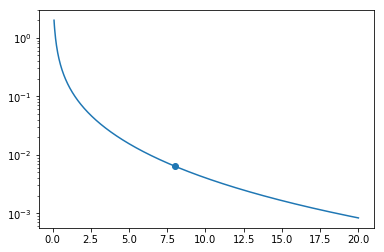

In [696]:
rho_dm_sun=0.0064*c.M_sun/c.pc**3
R_nfw=8*c.kpc
rho0=rho_dm_sun*(R_sun/R_nfw*(1+R_sun/R_nfw)**2)
rho_dm=rho0/((R/R_nfw)*(1+R/R_nfw)**2)
print rho0.to('Msun/kpc^3')/1.e7
plt.semilogy(R.to('kpc'),rho_dm.to('Msun/pc^3'))
plt.scatter(8,0.0064)
params['rho_dm']=np.interp(params['radius'],R.to('kpc'),rho_dm.to('Msun/pc^3'))

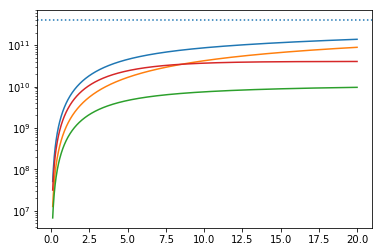

In [697]:
Mnfw=4*np.pi*rho0*R_nfw**3*(np.log(1+R/R_nfw)-R/(R_nfw+R))
Mgas1=2*np.pi*Sigma_gas1*R_gas1**2*(1-np.exp(-R/R_gas1)*(R/R_gas1+1))
Mgas2=2*np.pi*Sigma_gas2*R_gas2**2*(1-np.exp(-R/R_gas2)*(R/R_gas2+1))
Mstar=2*np.pi*Sigma_star0*R_star**2*(1-np.exp(-R/R_star)*(R/R_star+1))
Mgas=Mgas1+Mgas2
Mtot=Mnfw+Mgas+Mstar
plt.plot(R.to('kpc'),Mtot.to('Msun'),label='total')
plt.plot(R.to('kpc'),Mnfw.to('Msun'),label='dark matter')
plt.plot(R.to('kpc'),Mgas.to('Msun'),label='gas')
plt.plot(R.to('kpc'),Mstar.to('Msun'),label='star')
plt.axhline(4.e11,ls=':')
plt.yscale('log')

213.95154153


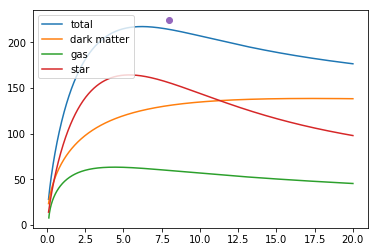

In [698]:
Vnfw=np.sqrt(c.G*Mnfw/R)
y1=(R/2.0/R_gas1).cgs.value
y2=(R/2.0/R_gas2).cgs.value
Vgas1=np.sqrt(4*np.pi*c.G*Sigma_gas1*R_gas1*y1**2*(sp.iv(0,y1)*sp.kn(0,y1)-sp.iv(1,y1)*sp.kn(1,y1)))
Vgas2=np.sqrt(4*np.pi*c.G*Sigma_gas2*R_gas2*y2**2*(sp.iv(0,y2)*sp.kn(0,y2)-sp.iv(1,y2)*sp.kn(1,y2)))
ystar=(R/2.0/R_star).cgs.value
Vstar=np.sqrt(4*np.pi*c.G*Sigma_star0*R_star*ystar**2*(sp.iv(0,ystar)*sp.kn(0,ystar)-sp.iv(1,ystar)*sp.kn(1,ystar)))
Vc=np.sqrt(Vnfw**2+Vgas1**2+Vgas2**2+Vstar**2)
plt.plot(R.to('kpc'),Vc.to('km/s'),label='total')
plt.plot(R.to('kpc'),Vnfw.to('km/s'),label='dark matter')
plt.plot(R.to('kpc'),Vgas.to('km/s'),label='gas')
plt.plot(R.to('kpc'),Vstar.to('km/s'),label='star')
plt.plot(8,28*8,'o')
plt.legend()
print np.interp(8.,R.to('kpc'),Vc.to('km/s'))

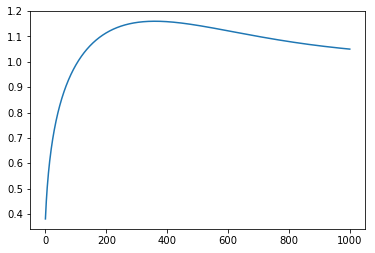

In [699]:
plt.plot(Vstar/np.sqrt(c.G*Mstar/R))


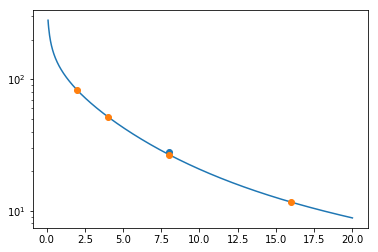

In [700]:
Omega=(Vc/R).to('km/s/kpc')
plt.semilogy(R.to('kpc'),Omega.to('km/s/kpc'))
params['Omega']=np.interp(params['radius'],R.to('kpc'),Omega.to('km/s/kpc'))
plt.plot(params['radius'],params['Omega'],'o')
plt.scatter(8,28)

[ 0.5620512   0.80080828  1.11099983  1.24179255]


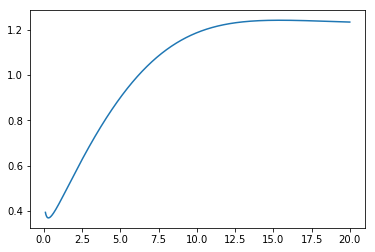

In [701]:
Rmid=0.5*(R[1:]+R[:-1])
Omid=0.5*(Omega[1:]+Omega[:-1])
q=-Rmid/Omid*Omega.diff()/R.diff()
plt.plot(Rmid.to('kpc'),q)
print np.interp(params['radius'],Rmid.to('kpc'),q)

11.7929798125 km / s


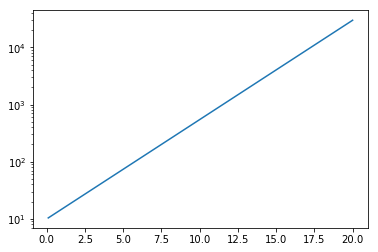

In [702]:
Hstar_sun=245*c.pc
sigma_star_sun = np.sqrt(Hstar_sun*np.pi*c.G*Sigma_star_sun)
print sigma_star_sun.to('km/s')
plt.semilogy(R.to('kpc'),Hstar_sun.to('pc')*Sigma_star_sun/Sigma_star)
params['H_star']=np.interp(params['radius'],R.to('kpc'),Hstar_sun.to('kpc')*Sigma_star_sun/Sigma_star)
# constant scale height
params['H_star']=0.245

# FUV Normalization

$$ 4\pi J_{\rm FUV} = \Sigma_{\rm FUV} \frac{1-E_2(\tau_\perp/2)}{\tau_\perp}$$
$$ \frac{\Gamma}{\Gamma_0}=\frac{J_{\rm FUV}}{J_{\rm FUV,0}}=\frac{\Sigma_{\rm FUV} f(\tau_\perp)}{\Sigma_{\rm FUV,0} f(\tau_{\perp,0})}=\frac{\Sigma_{\rm FUV}}{\Sigma_{\rm FUV,0}'}$$,
where 
$$\Sigma_{\rm FUV,0}'\equiv \frac{ \Sigma_{\rm FUV,0} f(\tau_{\perp,0})}{f(\tau_\perp)}= \frac{4 \pi J_{\rm FUV,0}}{f(\tau_\perp)}$$

6.84422621492 solLum / pc2
0.208908219167 pc2 / solMass
[ 6.85774915  2.99095759  0.76853435  0.13523458] [ 0.14489883  0.30974879  0.77988745  1.57505387]
[ 47.23451587  22.09605507   8.77591536   4.34539182] solLum / pc2


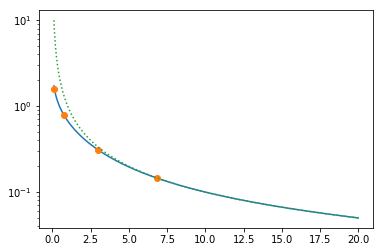

In [706]:
def fslab(tau):
    from scipy.special import expn
    return (1-expn(2,tau/2))/tau

JFUV0=2.2e-4*u.erg/u.cm**2/u.s
print 4*np.pi*JFUV0.to('Lsun/pc^2')
Sigma_FUV0=4*np.pi*JFUV0.to('Lsun/pc^2')
kappad=1.e3*u.cm**2/u.g
print kappad.to('pc^2/Msun')
tauperp=(kappad*params['surf_gas']*c.M_sun/c.pc**2).cgs.value/np.exp(1)
tau=np.linspace(0.1,20,1000)

f=fslab(tauperp)
print tauperp,f
print Sigma_FUV0/f
params['surf_fuv0']=Sigma_FUV0/f
plt.plot(tau,fslab(tau))
plt.plot(tauperp,f,'o')
plt.plot(tau,1/tau,ls=':')
plt.yscale('log')

In [720]:
torb=2*np.pi/(params['Omega']*u.km/u.s/u.kpc)
params['torb']= torb.to('Myr').value
rho_star=params['surf_star']*c.M_sun/c.pc**2/(params['H_star']*c.kpc)/2.0
#rho_gas=params['surf_star']*c.M_sun/c.pc**2/(params['H_star']*c.kpc)/2.0
params['rho_star']=rho_star.to('M_sun/pc**3').value
tver=np.sqrt(np.pi)/np.sqrt(4*c.G*(params['rho_star']+params['rho_dm'])*c.M_sun/c.pc**3)
params['tver']=tver.to('Myr').value
print tver.to('Myr')/40

[ 0.32858389  0.49384353  1.088242    4.71062239] Myr


In [729]:
import pandas as pd
label=[]
for r in params['radius']:
    label.append('R%d' % r)
model=pd.DataFrame(params,index=label)

In [730]:
print model.to_latex(float_format='%5.3g')

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  H\_star &  Omega &  radius &  rho\_dm &  rho\_star &  surf\_fuv0 &  surf\_gas &  surf\_star &  torb &  tver \\
\midrule
R2  &   0.245 &   82.7 &       2 &  0.0655 &     0.945 &       47.2 &      89.2 &        463 &  74.3 &  13.1 \\
R4  &   0.245 &   51.9 &       4 &  0.0228 &     0.425 &       22.1 &      38.9 &        208 &   118 &  19.8 \\
R8  &   0.245 &   26.7 &       8 &  0.0064 &    0.0857 &       8.78 &        10 &         42 &   230 &  43.5 \\
R16 &   0.245 &   11.6 &      16 & 0.00142 &   0.00349 &       4.35 &      1.76 &       1.71 &   528 &   188 \\
\bottomrule
\end{tabular}



In [741]:
# new model
class initial(object):
    def __init__(self,param={}):
        self.surf_s=param['surf_star']*c.M_sun/c.pc**2
        self.rho_dm=param['rho_dm']*c.M_sun/c.pc**3
        self.z0=param['H_star']*c.kpc
        self.R0=param['radius']*c.kpc
        self.surf_g=param['surf_gas']*c.M_sun/c.pc**2*1.3
        self.sig1=10*u.km/u.s
        self.sig2=10*self.sig1
        
    def gext(self,z):

        a1=2*np.pi*c.G*self.surf_s
        a2=4*np.pi*c.G*self.rho_dm
        g1=-a1*z/np.sqrt(z**2+self.z0**2)
        g2=-a2*z/(z**2/self.R0**2+1)
        g_new=g1+g2
    
        return g_new

    def phiext(self,z):
        phi=2*np.pi*c.G*(self.surf_s*(np.sqrt(z**2+self.z0**2)-self.z0)
                         +self.rho_dm*self.R0**2*np.log(1+z**2/self.R0**2))
        return phi
    
    def vesc(self,z):
        return np.sqrt(2*(self.phiext(z).to('km^2/s^2')))
    
    def phisg(self,z,zg):
        phi=2*np.pi*c.G*self.surf_g*np.abs(z)#(np.sqrt(z**2+zg**2)-zg)
        
        #phi=np.log(np.cosh((z/zg).cgs.value))*2*np.pi*c.G*self.surf_g*zg
        return phi
    def gsg(self,z,zg):
        gsg=-2*np.pi*c.G*self.surf_g#*np.tanh((z/zg).cgs.value)
        return gsg
    def set_n0(self,z):
    
        n0=1.0/u.cm**3
        
        for i in range(10):
            H=self.surf_g/2.0/(1.4271*c.m_p*n0)
            phitot=self.phiext(z)+self.phisg(z,H.to('pc'))
            phitot=phitot.to('km^2/s^2')

            rho10=n0*1.4*c.m_p
            rho20=0.00001*rho10
            rho1=rho10*np.exp(-(phitot-phitot.min())/self.sig1**2)
            rho2=rho20*np.exp(-(phitot-phitot.min())/self.sig2**2)
            rho=rho1+rho2
            nden=rho/1.4271/c.m_p
            
            n0=n0*(self.surf_g/(2.0*(rho.sum()*z[1]).to('Msun/pc^2'))).cgs
            #print n0,H.to('pc')
            #print n0,2.0*(rho1.sum()*z[1]).to('Msun/pc^2'),2.0*(rho.sum()*z[1]).to('Msun/pc^2')
        self.n0=n0
        self.H=H.to('pc')
        
    def den(self,z):
        phitot=self.phiext(z)+self.phisg(z,self.H)
        phitot=phitot.to('km^2/s^2')
        rho10=self.n0*1.4*c.m_p
        rho20=0.00001*rho10
        rho1=rho10*np.exp(-(phitot-phitot.min())/self.sig1**2)
        rho2=rho20*np.exp(-(phitot-phitot.min())/self.sig2**2)
        rho=rho1+rho2
        nden=rho/1.4271/c.m_p

        return nden,rho1,rho2
    
    def press(self,z):
        n,rho1,rho2=self.den(z)
        P1=rho1*self.sig1**2
        P2=rho2*self.sig2**2
        pok=(P1+P2).cgs/c.k_B.cgs
        
        return pok,P1,P2
    
    def pmag(self,z,beta=10):
        pok,P1,P2=self.press(z)
        Pmag=(P1+P2)/beta

        return Pmag
    
    def Bmag(self,z,beta=10):
        Pmag=self.pmag(z,beta=beta)
        return np.sqrt(Pmag.cgs*8*np.pi)
    
def draw_figure(param,z,beta=10):
    model=initial(param)
    model.set_n0(z)
    nden,rho1,rho2=model.den(z)
    n1=rho1/1.4271/c.m_p
    n2=rho2/1.4271/c.m_p
    
    
    plt.figure(figsize=(8,6))
    plt.subplot(221)
    
    plt.plot(z,n1,label='warm')
    plt.plot(z,n2,label='hot')
    plt.semilogy(z,nden,label='total')
    plt.legend(loc=0,fontsize='small')
    
    plt.ylabel(r'$n_H [{\rm cm}^{-3}]$')
    
    plt.subplot(222)

    pok,P1,P2=model.press(z)
    plt.plot(z,P1.cgs/c.k_B.cgs,label='warm')
    plt.plot(z,P2.cgs/c.k_B.cgs,label='hot')
    plt.semilogy(z,(P1+P2).cgs/c.k_B.cgs,label='thermal')
    
    if beta != np.inf: 
        Pmag=model.pmag(z)
        plt.plot(z,Pmag.cgs/c.k_B.cgs,label='mag')
    
    plt.legend(loc=0,fontsize='small')
    plt.ylabel(r'$P/k_B [{\rm cm}^{-3} {\rm K}]$')
    
    plt.subplot(223)

    plt.semilogy(z,np.sqrt((P1+P2)/(rho1+rho2)).to('km/s'),label=r'$c_s$')
    if beta != np.inf: 
        plt.plot(z,np.sqrt(2.0*Pmag/(rho1+rho2)).to('km/s'),label=r'$v_A$')
    plt.legend(loc=0,fontsize='small')
    plt.ylabel(r'$c_s, v_A [{\rm km/s}]$')
    
    if beta != np.inf: 
        B=model.Bmag(z)
        plt.subplot(224)
        plt.semilogy(z,B*1.e6,label=r'$\beta=10$')
        plt.semilogy(z,B*1.e6*np.sqrt(10),label=r'$\beta=1$')
        plt.semilogy(z,B*1.e6/np.sqrt(10),label=r'$\beta=100$')
        plt.ylabel(r'$B [\mu{\rm G}]$')
        
        plt.legend(loc=0,fontsize='small')
        print 'Bmag,0',B[0]*1.e6

    axes=plt.gcf().axes
    #plt.setp(axes,'xlim',(-2,2))
    plt.setp(axes,'xlabel',r'$z [{\rm kpc}]$')
    plt.tight_layout()

In [742]:
from galpy.potential import MWPotential,evaluatePotentials,evaluatezforces,MWPotential2014
from galpy.util import bovy_conversion
evaluatezforces(MWPotential,0.25,1)*bovy_conversion.force_in_kmsMyr(220.,8.)

-4.6822316304373599

23.7992790863 pc 0.25
45.4683807223 pc 0.5
130.235317519 pc 1.0
707.186908499 pc 2.0


(0, 0.5)

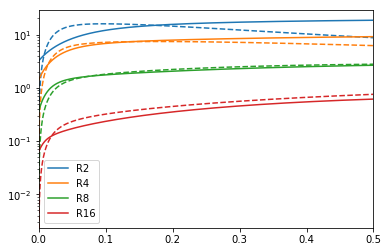

In [743]:
for l,p in model.T.iteritems():
    prof=initial(p)
    z=np.linspace(0,0.5,1000)
    r=p['radius']
    prof.set_n0(z*r*u.kpc)
    print prof.H,r/8.
    l,=plt.plot(z,-prof.gext(z*r*u.kpc).to('km/s/Myr')-prof.gsg(z*r*u.kpc,prof.H).to('km/s/Myr'),label=l)
    fz=[]
    for zz in z:
        fz.append(-evaluatezforces(MWPotential2014,r/8.,zz)*bovy_conversion.force_in_kmsMyr(220.,8.))
    plt.plot(z,fz,color=l.get_color(),ls='--')
plt.legend()
plt.yscale('log')
plt.xlim(0,0.5)

24.2990272233 pc 245.0 pc 67.7014308808 1 / cm3 1.04265344699
46.4658569978 pc 245.0 pc 15.4412140705 1 / cm3 2.18322343885
132.22370796 pc 245.0 pc 1.39430919619 1 / cm3 7.26539718454
711.169522958 pc 245.0 pc 0.0456162704811 1 / cm3 40.1678900518


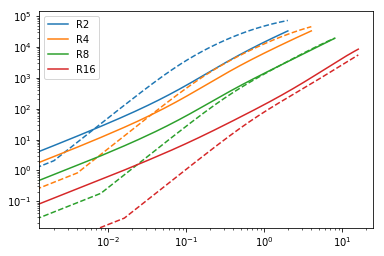

In [757]:
for l,p in model.T.iteritems():
    prof=initial(p)
    z=np.linspace(0,1,1000)
    r=p['radius']
    prof.set_n0(z*r*u.kpc)
    print prof.H,prof.z0.to('pc'),prof.n0,8/np.sqrt(prof.n0/1.15).value
    l,=plt.plot(z*r,prof.phiext(z*r*u.kpc).to('km^2/s^2')+prof.phisg(z*r*u.kpc,prof.H).to('km^2/s^2'),label=l)
    Phi=evaluatePotentials(MWPotential2014,r/8.,z)*220.**2
    plt.plot(z*r,Phi-Phi[0],color=l.get_color(),ls='--')
plt.legend()
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,1)

# Initial profiles

* Double exponentials
$$\rho(z)=\rho_1\exp(-z/H_1)+\rho_2\exp(-z/H_2)$$
$$\Sigma = 2\rho_1H_1+2\rho_2H_2$$
    * Let $\Sigma_2=0.01\Sigma_1$, $\sigma_1=7 \textrm{km/s}$, and $T_2=100T_1$. 
    * $H_1/H_2=\sigma_1/\sigma_2=(T_1/T_2)^{1/2}=0.1$, $\rho_2=0.01\rho_1 H_1/H_2=0.001\rho_1$
* Directly from potentials
$$\rho(z)=\rho\exp[-(\Phi(z)-\Phi_0)/c_s^2]$$
    * For two-components,
    $$\rho(z)\approx\rho_1\exp[-(\Phi(z)-\Phi_0)/\sigma_1^2]+\rho_2\exp[-(\Phi(z)-\Phi_0)/\sigma_2^2]$$
    * $$\Sigma=2\int_0^\infty\rho(z)dz=2(\rho_1H_1+\rho_2H_2),$$
    where
    $$H\equiv\int_0^\infty\exp(-\Phi(z)/\sigma^2)dz$$.
    * $$\frac{\Phi}{\sigma^2}=\frac{2\pi G \Sigma_* z_*}{\sigma^2}[\sqrt{1+(z/z_*)^2}-1]+\frac{2\pi G\rho_{\rm dm}R_0^2}{\sigma^2}\ln[1+(z^2/R_0^2)]\equiv \phi_1f(z)+\phi_2g(z)$$

Bmag,0 23.8287842904 P(1/2) / s(1/2)
Bmag,0 10.7107648167 P(1/2) / s(1/2)
Bmag,0 2.60254450716 P(1/2) / s(1/2)
Bmag,0 0.422309533554 P(1/2) / s(1/2)


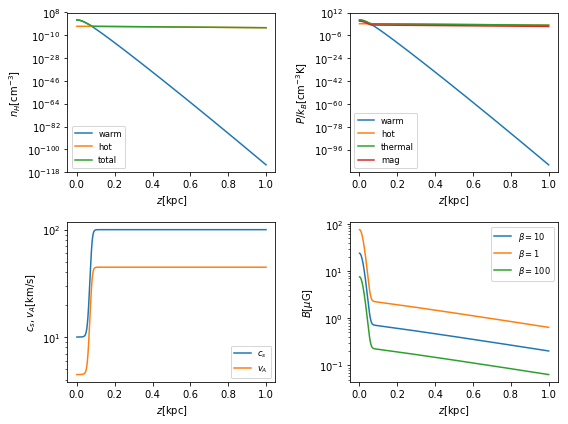

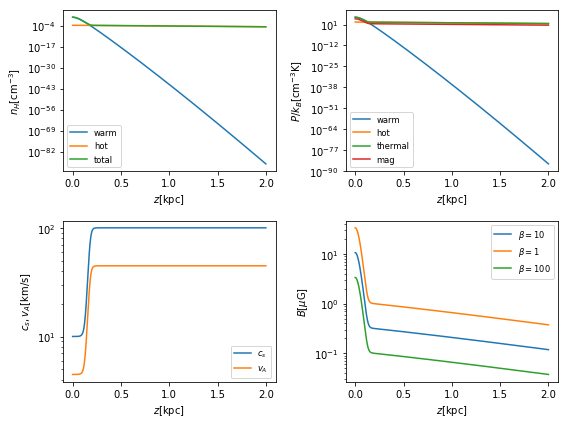

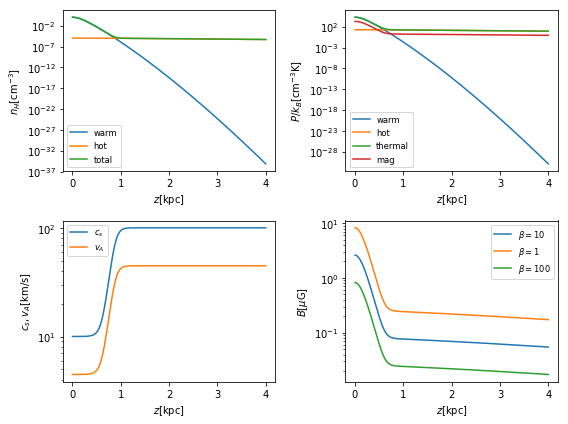

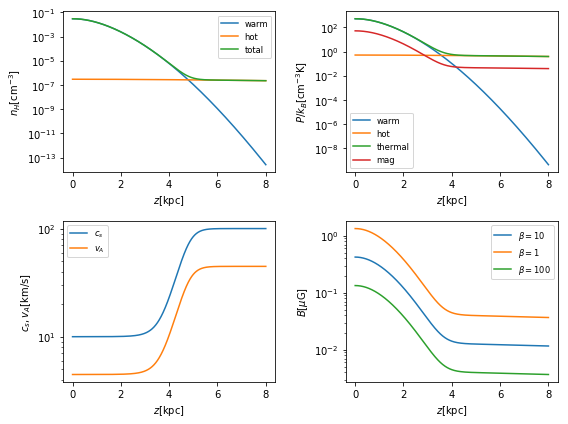

In [436]:
for r,p in model.T.iteritems():

    z=np.linspace(0,0.5,1000)
    draw_figure(p,z*r*u.kpc)


In [518]:
galpy.potential.MWPotential2014

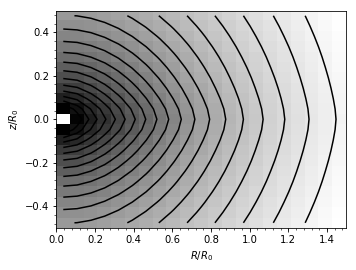

In [519]:
galpy.potential.plotPotentials(MWPotential)

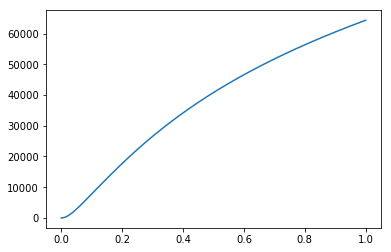

In [444]:
z=np.linspace(0,1,1000)
Phi=evaluatePotentials(MWPotential,2/8.,z)*220.**2
plt.plot(z,Phi-Phi[0])

In [634]:
model

,H_star,Omega,radius,rho_dm,surf_gas,surf_star
2,0.245,82.701117,2,0.065538,89.231984,462.976875
4,0.245,51.917819,4,0.022756,38.917883,208.028482
8,0.245,26.743987,8,0.006400,10.000052,42.000323
16,0.245,11.624869,16,0.001422,1.759652,1.712021
